<a id='step1'></a>

**Комментарий ревьюера**

Привет, Илья! Меня зовут Сергей Волков, я буду проверять твой проект по численным методам. Если не против, давай общаться на «ты». Если это неудобно, дай знать, перейдем на «вы».

У тебя проделана большая работа над проектом, но давай сделаем его еще лучше. Дальше ты найдешь мои комментарии — пожалуйста, не перемещай и не удаляй их. Буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌красный текст - так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание. Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️зеленый текст - все отлично.</div>

Давай работать над проектом в диалоге: если что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Илья, рад  тебя снова приветствовать! Повторные реакции и комментарии буду отмечать v.2</div>

# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div style="border:solid green 2px; padding: 20px">
    
    
### Основная цель:<a class="tocSkip">        

    
  Для приложение  по продаже автомобилей, сервиса __"Не бит, не крашен"__ - необходимо __построить и внедрить  модель__ оперативно определяющую __стоимость автомобиля__ пользователя.  
    
    
 
### Задачи  проекта:<a class="tocSkip">

- 1 __Подготовить данные__<br>
    
- 2 __Обучить разные модели. Для каждой попробовать различные гиперпараметры.__<br>
       
- 3 __Проанализировать скорость работы и качество моделей.__.
    
- 4 Для оценки качества моделей применить метрику __RMSE__. Освоить библиотеку __LightGBM__ и её средствами постройть модель __градиентного бустинга__. 
    


</div>

<div style="border:solid green 2px; padding: 20px">
    
  


   
### Набор данных находится в файле:<a class="tocSkip">
- `/datasets/autos.csv` — исходный датасет.

   
    
### Описание данных <a class="tocSkip"> 
 
### Признаки:<a class="tocSkip">
    
- __DateCrawled__ — дата скачивания анкеты из базы
- __VehicleType__ — тип автомобильного кузова
- __RegistrationYear__ — год регистрации автомобиля
- __Gearbox__ — тип коробки передач
- __Power__ — мощность (л. с.)
- __Model__ — модель автомобиля
- __Kilometer__ — пробег (км)
- __RegistrationMonth__ — месяц регистрации автомобиля
- __FuelType__ — тип топлива
- __Brand__ — марка автомобиля
- __NotRepaired__ — была машина в ремонте или нет
- __DateCreated__ — дата создания анкеты
- __NumberOfPictures__ — количество фотографий автомобиля
- __PostalCode__ — почтовый индекс владельца анкеты (пользователя)
- __LastSeen__ — дата последней активности пользователя    
    
### Целевой признак: <a class="tocSkip">
- __Price__ — цена (евро)   
    
###   Заказчику важны: <a class="tocSkip">

- качество предсказания;
- скорость предсказания;
- время обучения.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Здорово, что вместе с названием есть краткое описание проекта. Рчень аккуратно оформлено🔥</div>

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sn # подключение графической библиотеки seaborn
import matplotlib.pyplot as plt #импортируем библиотеку для графиков matplotlib 
import plotly.express as px# функция для создания таблиц и визуализации plotly

import warnings # игнор ошибок
warnings.simplefilter('ignore')# отменяет вывод таблицы предупреждения ошибки

%matplotlib inline



from sklearn.ensemble import RandomForestRegressor # Импорт модель RandomForestRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor # Импорт модель DecisionTreeRegressor из библиотеки sklearn
from sklearn.linear_model import LinearRegression # Импорт модель LinearRegression из библиотеки sklearn
from sklearn.model_selection import cross_val_score # Импорт функцию cross_val_score из библиотеки sklearn
from sklearn.model_selection import GridSearchCV # Импорт функцию GridSearchCV из библиотеки sklearn
from sklearn.metrics import make_scorer # Импорт функцию make_scorer из библиотеки sklearn
from sklearn.model_selection import train_test_split # Импорт функцию train_test_split из библиотеки sklearn
from sklearn.metrics import mean_squared_error #Импортирую метрику mean_squared_error из библиотеки sklearn
from sklearn.metrics import accuracy_score # Импорт метрику accuracy_score из библиотеки sklearn
import lightgbm as lgb # Импорт Light GBM
import catboost as cb # Импорт CatBoost
import time # функция определения времени выполнения кода
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Время выполнения кода: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
start = time.time()

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе.

## Подготовка данных
[&#10224;](#step1)

 <div style="border:solid green 2px; padding: 20px">
    
**На данном этапе** <br>
    
- Загрузим данные для анализа
- Сделаем предварительное ознакомление
- При необходимости произведем предобработку данных     
   
</div>

__Загрузка данных__

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)# вывод без экспонентациальных форм и лишних запятых.
pd.set_option('display.max_columns', None) # вывод всех колонок датасета без урезания.

try: #конструкция try-except помогает выбрать работающий путь к исследуемым файлам
    df = pd.read_csv('/data_set/autos.csv')#  /Работа - Локально/
   
except:
    df = pd.read_csv('/datasets/autos.csv')# /Работа - сервер Яндекс/
   

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Отлично	👍

__Общая информация о полученных данных__

In [3]:
l = [df]# с помощью цикла пройдемся по исследуемому датасету,выведем результаты  проверок.
for i in l:
    object_featur = i.shape[0:2]
    columns = ['строк',  'столбцов'] #Объеденим полученные результаты в таблицу
    object_featur = pd.DataFrame([object_featur], columns = columns)
    display("Общая информация по датафрейму:",object_featur,i.head(3),print("________________________________"))
    display(print("Типы данных:"),i.info())# смотрим на типы даннх
    display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
    # код ниже находит и оформляет в таблицу пропущенные значения
    report = i.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
    display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

________________________________


'Общая информация по датафрейму:'

,строк,столбцов
0,354369,16


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


None

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int6

None

None

'Количество обнаруженных дубликатов:'

4

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,NotRepaired,71154,20.08
1,VehicleType,37490,10.58
2,FuelType,32895,9.28
3,Gearbox,19833,5.60
4,Model,19705,5.56
5,DateCrawled,0,0.00
6,Price,0,0.00
7,RegistrationYear,0,0.00
8,Power,0,0.00
9,Kilometer,0,0.00


__Оценим цифровые показатели в таблице___

In [4]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,"354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00","354,369.00"
mean,"4,416.66","2,004.23",110.09,"128,211.17",5.71,0.00,"50,508.69"
std,"4,514.16",90.23,189.85,"37,905.34",3.73,0.00,"25,783.10"
min,0.00,"1,000.00",0.00,"5,000.00",0.00,0.00,"1,067.00"
25%,"1,050.00","1,999.00",69.00,"125,000.00",3.00,0.00,"30,165.00"
50%,"2,700.00","2,003.00",105.00,"150,000.00",6.00,0.00,"49,413.00"
75%,"6,400.00","2,008.00",143.00,"150,000.00",9.00,0.00,"71,083.00"
max,"20,000.00","9,999.00","20,000.00","150,000.00",12.00,0.00,"99,998.00"


__Посмотрим на корреляцию количественных признаков в датасете___

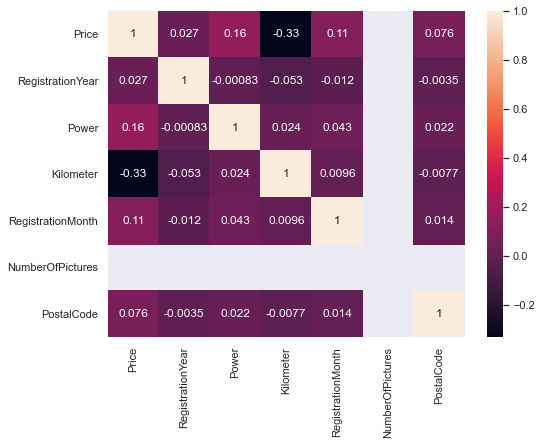

In [5]:
sn.set(rc={'figure.figsize':(8,6)})
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

 <div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>
Предварительный анализ полученного датасета, указывает на необходимость предобработки. Большое количество __пропусков__ 0 __нулевые значения__ и  не логично высокие показатели в некоторых признаках.
    
   
</div>

<div class="alert alert-block alert-success">
    
<b>Комментарий ревьюера:</b> ✔️Отлично.Данные загруженны, есть первичный осмотр и первичный анализ данных.

__1 Смена регистра в названиях столбцов с заглавных на прописные.__

In [6]:
df.columns = df.columns.str.lower()
df.head(2)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


__2 Обработка пропусков в данных.__ Столбцы: __NotRepaired__, __VehicleType__, __FuelType__, __Gearbox__, __Model__

__Методами bfill().ffill() подставим ближайщие значения вместо  пропусков в столбцах__ `NotRepaired, VehicleType, FuelType, Gearbox, Model`

In [7]:
# Вариант № 1
df = df.bfill().ffill()
#Метод df.bfill().ffill()  заливка обнаруженных пропусков в столбцах  по соседним результатам

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️В целом здорово. Но стоит добавить пару слов,  почему выбрана  имеено такая стратегия заполнения, notrepaired можно назвать бинарным признаком, везде, где пропуски его можно щаменит на no, руководствовыаясь той логикой, что если не указано, то машина не ремонтировалась, если предположить, что намерено скрыли информацию, можно сделать разбивку до 100 000 км., заполняем no, более yes.)   </div>

<div class="alert alert-info"><b>Комментарий студента:</b> <br>Сергей, привет. Твой вариант более профессиональный.Со времнем начинаю понимать,что  для того  что бы превратить данные, на предобрабоке, в качественные - нужно быть глубоко в теме предмета исседования, видимо в этом и есть одна из имзюминок специалиста по данным (импровизация с информациец). Мое решение было основано на том, что я посмотрев на количество  (no yes) пропорционально поделил между ними  NaN. Для этого df.bfill(),df.ffill() подошли как нельзя кстати. Сейчас понимаю, после твоего примера, что я практически, только увеличил размер, но качества не добавил. Ориентируясь на твой пример, похожим образом можно было и с коробками поступить, только здесь учесть год выпуска, сделать небольшой анализ до какого года вообще с автоматом не было, а после проанализировать пропорции и заполнить пропуски соответственно  по года.</div> <b> 
 </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Рад, что ты оценил рекомендацию. Ты и сосвоим методом достиг нужной метрики, но если бы не получилось, пришлось бы возвращаться к предобработке.</div>

In [8]:
# с помощью цикла пройдемся по исследуемому датасету, применим метод ffill, выведем результаты  проверок.
l = [df]
for i in l:      
    display(print("Типы данных:"),i.info())# смотрим на типы даннх
    display("Количество обнаруженных дубликатов:",i.duplicated().sum())# проверим полученные таблицы на дубликаты
    # код ниже находит и оформляет в таблицу пропущенные значения
    report = i.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / i.shape[0]*100).round(2)
    display('Пропущенных значений в таблице :',(report.sort_values(by = 'missing_values', ascending = False).reset_index()))

Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        354369 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            354369 non-null  object
 5   power              354369 non-null  int64 
 6   model              354369 non-null  object
 7   kilometer          354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           354369 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        354369 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int6

None

None

'Количество обнаруженных дубликатов:'

5

'Пропущенных значений в таблице :'

,index,missing_values,% of total
0,datecrawled,0,0.00
1,price,0,0.00
2,vehicletype,0,0.00
3,registrationyear,0,0.00
4,gearbox,0,0.00
5,power,0,0.00
6,model,0,0.00
7,kilometer,0,0.00
8,registrationmonth,0,0.00
9,fueltype,0,0.00


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️В целом все хорошо и наглядно. Но лучше избегать циклы в dataframe, если это возможно.   </div>

<div class="alert alert-info"><b>Комментарий студента:</b> <br>Хорошо</div> <b> 
 </div>

__Приведение Качественных признаков в количественные__

__Переведем столбецы `notrepaired` и `gearbox` из категориальных признаков в чиcловые__

In [9]:
# Вариант № 1
# переведем значения в столбце notrepaired со строковых "no"  и  "yes" в числовые "0" и "1"
def yes_no(notrepaired):
       
        if notrepaired == 'no':
                return 1
        if notrepaired == 'yes' :
                return 0
df['notrepaired'] = df['notrepaired'].apply(yes_no)


# Вариант № 2 
# переведем значения в столбце notrepaired со строковых "no"  и  "yes" в числовые "0" и "1"
gearbox_mapping = {'auto': 0, 'manual' : 1}
df['gearbox'] = df['gearbox'].map(gearbox_mapping)
 

In [10]:
df['notrepaired'].value_counts()

1    309243
0     45126
Name: notrepaired, dtype: int64

In [11]:
df['gearbox'].value_counts()

1    284093
0     70276
Name: gearbox, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⚠️Хорошо. Но нужно учитывать, что если попадется похожая задача в жизни типов КПП не всегда 2, а это фактор влияющий на стоимость транспортного средства.   </div>

__Переведем столбец `fueltype` из категориальных признаков в чиловые__

Откорректируем и объеденим схожие категории

In [12]:
df.loc[df['fueltype'] == 'electric', 'fueltype'] = 'hybrid'# в столбце fueltype занчение electric меняем на hybrid
df.loc[df['fueltype'] == 'gasoline', 'fueltype'] = 'diesel'# в столбце fueltype занчение gasoline меняем на diesel
df.loc[df['fueltype'] == 'lpg'  , 'fueltype'] = 'gaz'# в столбце fueltype занчение lpg меняем на gaz
df.loc[df['fueltype'] == 'cng', 'fueltype'] = 'gaz'#в столбце fueltype занчение cng меняем на gaz
df.loc[df['fueltype'] == 'other', 'fueltype'] = 'gaz'#в столбце fueltype занчение other меняем на gaz


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⚠️У тебя опечатка в последней строке)   </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> исправил
</div>

In [13]:
df['fueltype'].value_counts()

petrol    238550
diesel    108749
gaz         6718
hybrid       352
Name: fueltype, dtype: int64

Применим  технику OHE

In [14]:
df_fueltype = pd.get_dummies(df['fueltype'], drop_first = True ) 
#Применим  технику OHE, и чтобы не попасть в Дамми-ловушку, аргументом drop_first («сбросьте первый»), сбросим первый столбец
df_fueltype.value_counts()


gaz  hybrid  petrol
0    0       1         238550
             0         108749
1    0       0           6718
0    1       0            352
dtype: int64

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Можно было не переводить в бинарный признак,если кодируем этот столбец.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> <br> Не совсем понял замечание. Я здесь для уменьшения параметров объединил некоторые, схожие, из них. Они как были категориальные, так и остались. Их все равно через  ОНЕ пропускать. Может чегото не понимаю? Поправь.</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Ну я имел ввиду, мы могли бы попереводить в бинарные признаки, то что возможно, к оставшимся применить кодировку и объеденить в один датафрейм. В принципе ниже ты ответил  на мой вопрос)</div>

__Переведем столбец `vehicletype` из категориальных признаков в чиловые__

Откорректируем и объеденим схожие категории

In [15]:
df.loc[df['vehicletype'] == 'coupe', 'vehicletype'] = 'convertible'# в столбце vehicletype занчение coupe меняем на convertible
df.loc[df['vehicletype'] == 'small', 'vehicletype'] = 'sedan'# в столбце vehicletype занчение small меняем на sedan
df.loc[df['vehicletype'] == 'other', 'vehicletype'] = 'sedan'# в столбце vehicletype занчение bus меняем на sedan
df.loc[df['vehicletype'] == 'bus', 'vehicletype'] = 'wagon'# в столбце vehicletype занчение bus меняем на wagon

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Поясни пожалуйста, почему имеено такая логика.</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> <br>По началу думал, что более компактная группировка будет способствовать качеству, и еще отсутвие дизеля, несколько газов, сподвигнуло меня на приключения, но после того, как добрался до таких столбцов как model и brand понял!, что это пустая затея, эти два стобца fueltype, vehicletype,  можно было ОНЕй с отстальным без выкрутасов обработать.</div>

In [16]:
df['vehicletype'].value_counts()

sedan          195207
wagon          105009
convertible     40714
suv             13439
Name: vehicletype, dtype: int64

Применим  технику OHE

In [17]:
df_vehicletype = pd.get_dummies(df['vehicletype'], drop_first = True ) 
#Применим  технику OHE, и чтобы не попасть в Дамми-ловушку, аргументом drop_first («сбросьте первый»), сбросим первый столбец
df_vehicletype.value_counts()

sedan  suv  wagon
1      0    0        195207
0      0    1        105009
            0         40714
       1    0         13439
dtype: int64

__Объеденим полученные таблицы с df__

In [18]:
df = pd.concat([df,df_fueltype,df_vehicletype], axis=1)

In [19]:
df.duplicated().sum()# смотрим результат о наличии дубликатов

5

In [20]:
df.head(2)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen,gaz,hybrid,petrol,sedan,suv,wagon
0,2016-03-24 11:52:17,480,convertible,1993,1,0,golf,150000,0,petrol,volkswagen,0,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,0,0,1,0,0,0
1,2016-03-24 10:58:45,18300,convertible,2011,1,190,grand,125000,5,diesel,audi,0,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,0,0,0,0,0,0


__3 Выбросы__ и __0(нулевые)__ значения в данных. Столбцы: __RegistrationYear__, __Price__, __Power__, __RegistrationMonth__, __NumberOfPictures__  

__Создадим функцию `remove`, в которой сможем убирать значения   Т.е значения не попадающие в интересующий нас интервал, и не актуальных  для исследования__

In [21]:
def remove_interference(d,column,little,big):     # аргументы -  датафрейм, столбец, диапазон значений от ittle до  big
    f = d.loc[(d[column] >= little ) &(d[column] <= big )]   
    print('Изначальный размер таблицы',d.shape)
    print('Размер после удаления выбросов',f.shape)
    return f

__Столбец__ `RegistrationYear`

______________________________________________________________________________________________


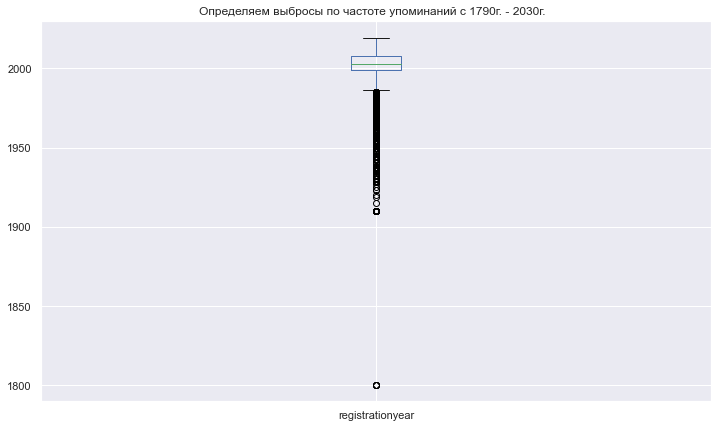

______________________________________________________________________________________________


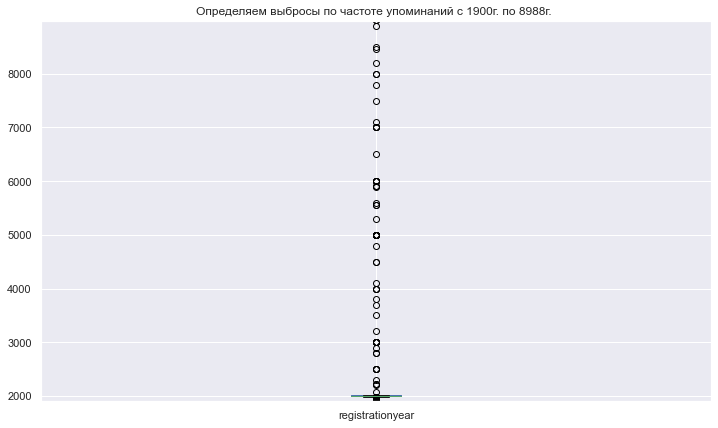

In [22]:
# Для оценивания выбросов строим боксплот
print('______________________________________________________________________________________________')
df.plot(y='registrationyear', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминаний с 1790г. - 2030г.  ')
plt.ylim(1790,2030)
plt.xlim(0, 2) 
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='registrationyear', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминаний c 1900г. по 8988г. ')
plt.ylim(1900,8988)
plt.xlim(0, 2) 
plt.show()

__Обратимся к функции `remove_interference` и удалим нестандартные значения в столбце registrationyear__

In [23]:
df = remove_interference(df,'registrationyear',1960,2019) #подбираем параметры для удаления
#выбираем годовой диапазон  от 1960г. до 2019г.

Изначальный размер таблицы (354369, 22)
Размер после удаления выбросов (353842, 22)


In [24]:
# Вариант №2
# методом query сделаем срез данных за период с  1960 по 2019 г. тем самым удалим выбросы по не актуальным годам.
#df = df.query('registrationyear >= 1960  and registrationyear <= 2019')

__Посмотрим на результат после удаления выбросов__

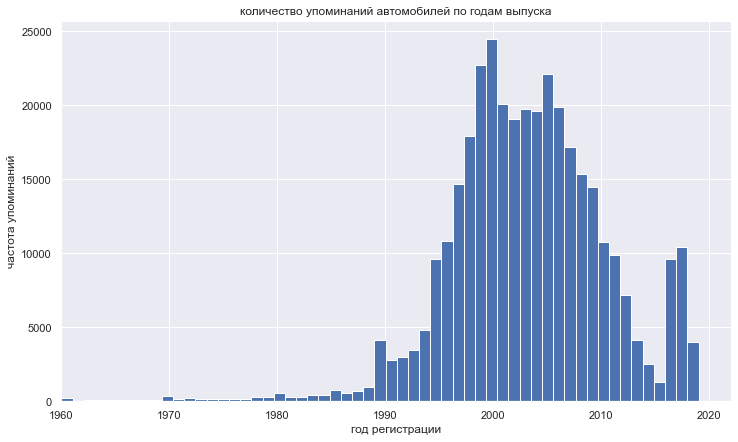

______________________________________________________________________________________________


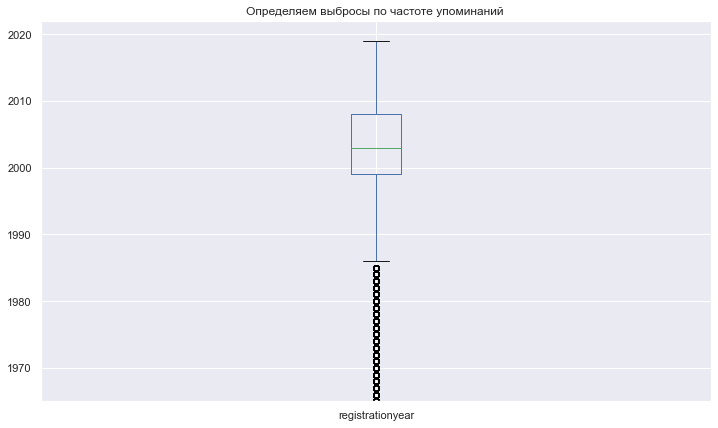

In [25]:
df['registrationyear'].hist(bins= 57,figsize=(12, 7)).set_title('количество упоминаний автомобилей по годам выпуска')
plt.xlim(1960,2022)

plt.xlabel("год регистрации")
plt.ylabel("частота упоминаний")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='registrationyear', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминаний ')
plt.ylim(1965,2022)
plt.xlim(0, 2) 
plt.show()

__Сделали срез данных корректного периода по дате регистрации автомобиля__

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично! От части выбросов избавились.
</div>

__Столбец__ ` Price`

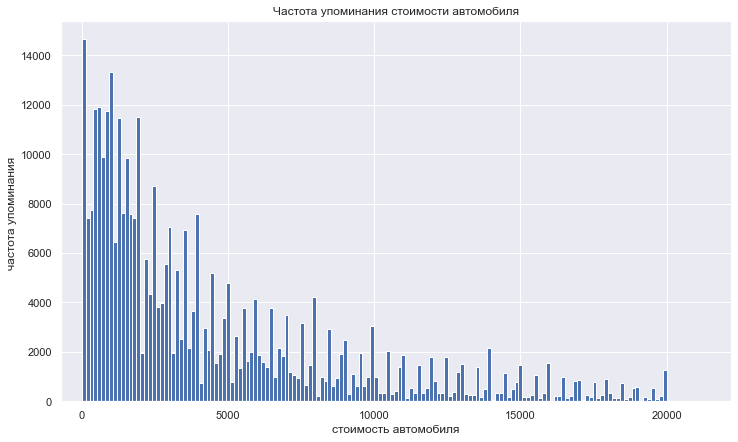

______________________________________________________________________________________________


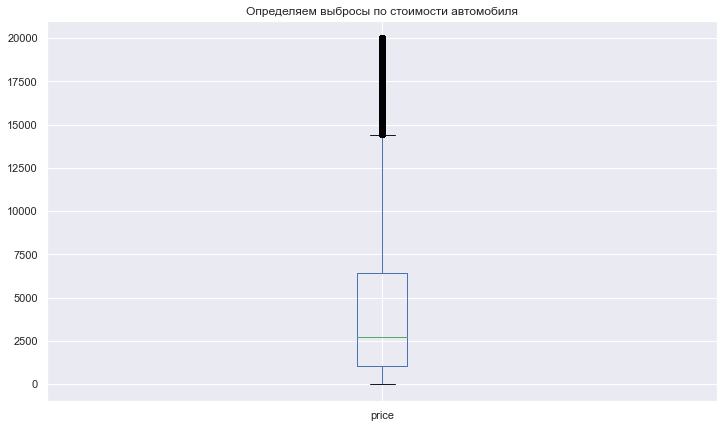

In [26]:
# Для оценивания выбросов строим гистограму и  боксплот по столбцу price
df['price'].hist(bins=150,figsize=(12, 7)).set_title('Частота упоминания стоимости автомобиля')
plt.xlim(-700,22200)

plt.xlabel("стоимость автомобиля")
plt.ylabel("частота упоминания ")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='price', kind='box', figsize=(12, 7),title='Определяем выбросы по стоимости автомобиля')
plt.ylim(-1000, 21000)
plt.xlim(0, 2) 
plt.show()

__Сделали срез данных корректного периода регистрации автомобиля__

__Обратботка  значения 0 в столбце price__

In [27]:
df['price'].value_counts() # имеем большое количество значения  0 - 10671 строка

0        10671
500       5656
1500      5388
1000      4643
1200      4592
         ...  
13440        1
1414         1
8069         1
10370        1
384          1
Name: price, Length: 3731, dtype: int64

In [28]:
# Вариант № 1 Заменим значение цены = 0  ближайшими значениями
df.loc[df['price'] == 0, 'price'] = pd.NA
df['price'] = df['price'].fillna(method='bfill')


# Вариант № 2 заменим значение 0 в столбце price на медианное значение
#df.loc[df['price'] == 0, 'price'] = df['price'].median() # в столбце price занчение 0 меняем на df.median()

__Обратимся к функции `remove_interference` и удалим нестандартные значения в столбце price__

In [29]:
df = remove_interference(df,'price',40,20000) #удаляем нестандартные значения в столбце price 
#выбираем ценовой диапазон от 40 до 20000 евро.

Изначальный размер таблицы (353842, 22)
Размер после удаления выбросов (352259, 22)


In [30]:
 df['price'].value_counts()

500     5845
1500    5555
1000    4793
1200    4722
2500    4567
        ... 
6996       1
8887       1
8663       1
467        1
8188       1
Name: price, Length: 3699, dtype: int64

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Интересный способ, но в принципе нулевые цены можно было просто удалить их 2% от общего колличества.
</div>

<div class="alert alert-info"> 
<b>Комментарий студента:</b><br> Сердце ёкнуло, откуда 3-я  итерация? Шучу! Согласен, можно и не только 3-ю устроить. Первые уроки, можно сказать с молоком датаматери внушили, - к данным нужно относиться бережно. Стараюсь всячески предобработать, если более менее, помиомо одного признака, информативные остальные - обрабатываю, а когда сплош ноли да Nan под нож. И да, - важен размер.  </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Это не замечание было, просто была интересна лоика, ты праы, может быть в другой задаче это было бы критично, например там в задачах химии, где какие-нибудь молекулы и удалять ничего нельзя.</div>

__Посмотрим на результат после удаления выбросов__

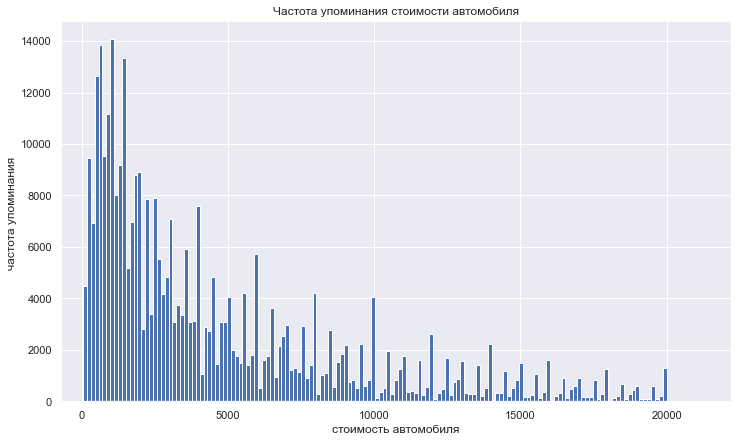

______________________________________________________________________________________________


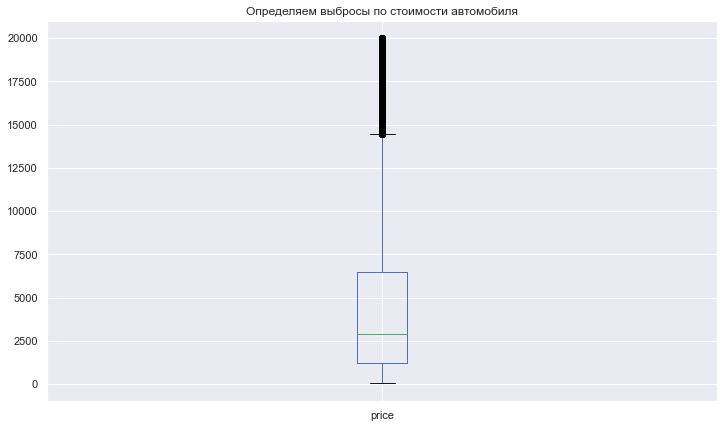

In [31]:
# Для оценивания выбросов строим гистограму и  боксплот по столбцу price
df['price'].hist(bins=150,figsize=(12, 7)).set_title('Частота упоминания стоимости автомобиля')
plt.xlim(-700,22200)

plt.xlabel("стоимость автомобиля")
plt.ylabel("частота упоминания ")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='price', kind='box', figsize=(12, 7),title='Определяем выбросы по стоимости автомобиля')
plt.ylim(-1000, 21000)
plt.xlim(0, 2) 
plt.show()

__Заменили значения  скорость 0 на ближайшие показатели убрали выбросы__

__Столбец__ `Power`

In [32]:
df['power'].value_counts() # имеем большое количество значения  0 - 39144 строк

0       39144
75      23937
60      15855
150     14528
101     13268
        ...  
1968        1
6226        1
337         1
1105        1
6006        1
Name: power, Length: 708, dtype: int64

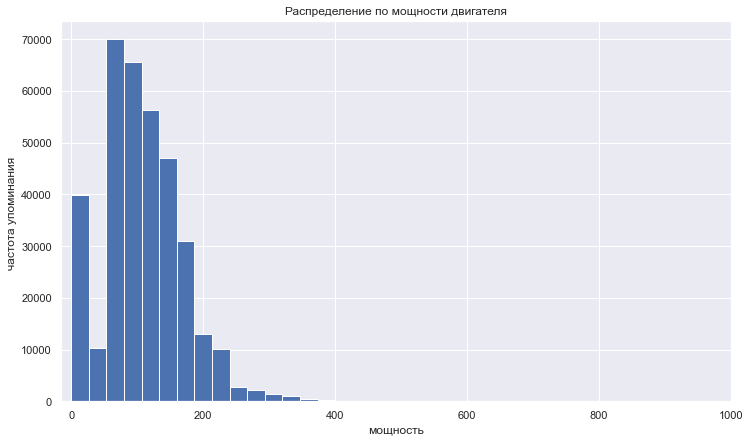

______________________________________________________________________________________________


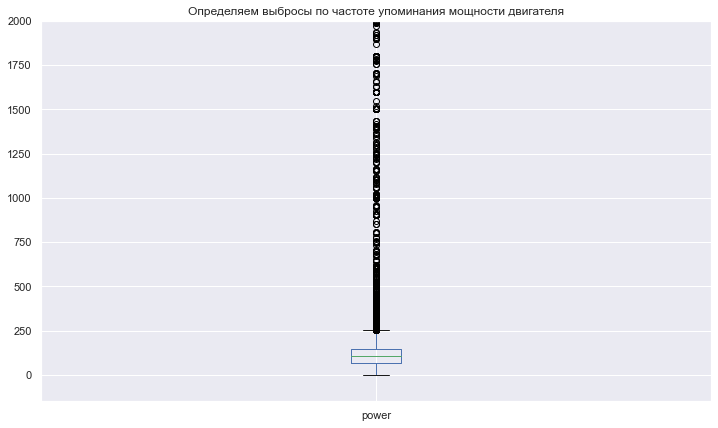

In [33]:
df['power'].hist(bins=750,figsize=(12, 7)).set_title('Распределение по мощности двигателя')
plt.xlim(-15,1000)

plt.xlabel("мощность")
plt.ylabel("частота упоминания ")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='power', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминания мощности двигателя')
plt.ylim(-150, 2000)
plt.xlim(0, 2) 
plt.show()

__Обратботка  значения 0 в столбце power__

In [34]:
df['power'].value_counts() # имеем большое количество значения  0 - 39144 строк

0       39144
75      23937
60      15855
150     14528
101     13268
        ...  
1968        1
6226        1
337         1
1105        1
6006        1
Name: power, Length: 708, dtype: int64

In [35]:
# Вариант № 1 Заменим значение мощности = 0  ближайшими значениями
df.loc[df['power'] == 0, 'power'] = pd.NA
df['power'] = df['power'].fillna(method='bfill')

# Вариант № 2 заменим значение 0 в столбце power на медианное значение
#df.loc[df['power'] == 0, 'power'] = df['power'].median() # в столбце power занчение 0 меняем на df.median()

__Обратимся к функции `remove_interference` и удалим нестандартные значения в столбце power__

In [36]:
df = remove_interference(df,'power',5,500) #удаляем нестандартные значения в столбце power 
#выбираем  диапазон мощности автомобилей от 5 до 10000 Л/с.

Изначальный размер таблицы (352259, 22)
Размер после удаления выбросов (351685, 22)


In [37]:
df['power'].value_counts() # заменили значение 0 и убрали мощность больше 500 Л/с

75     26946
60     17846
150    16352
101    14956
140    14435
       ...  
489        1
402        1
485        1
398        1
442        1
Name: power, Length: 408, dtype: int64

__Посмотрим на результат после удаления выбросов__

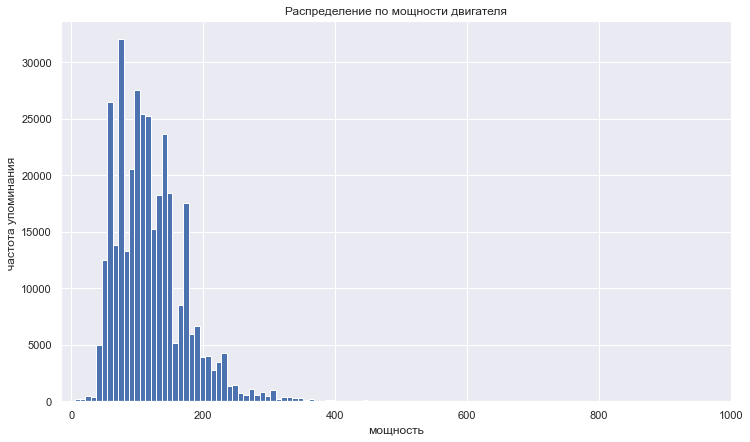

______________________________________________________________________________________________


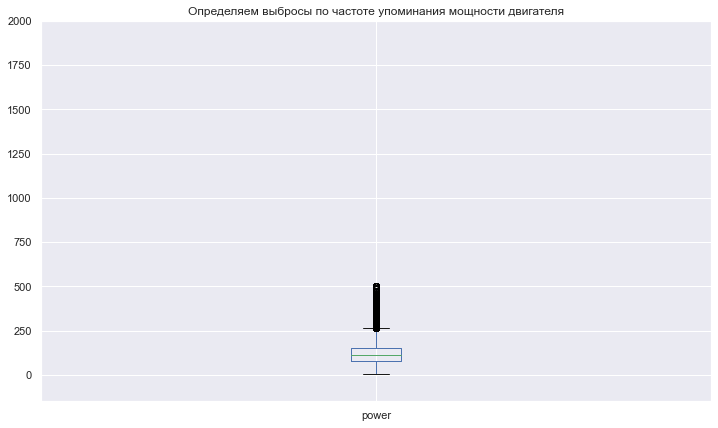

In [38]:
df['power'].hist(bins=60,figsize=(12, 7)).set_title('Распределение по мощности двигателя')
plt.xlim(-15,1000)

plt.xlabel("мощность")
plt.ylabel("частота упоминания ")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='power', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминания мощности двигателя')
plt.ylim(-150, 2000)
plt.xlim(0, 2) 
plt.show()

__Заменили значения  мощность 0 на ближайшие показатели, убрали выбросы__

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично!От выбросов избавились.
</div>

__Столбец__ `kilometer`

In [39]:
df['kilometer'].value_counts() # заменили значение 0 и убрали мощность больше 500 Л/с

150000    236812
125000     36310
100000     14757
90000      11521
80000      10008
70000       8553
60000       7418
50000       6200
5000        5781
40000       4893
30000       4399
20000       3915
10000       1118
Name: kilometer, dtype: int64

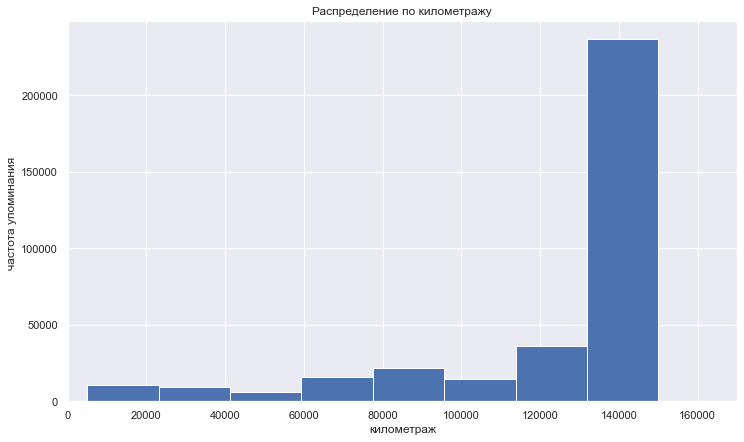

______________________________________________________________________________________________


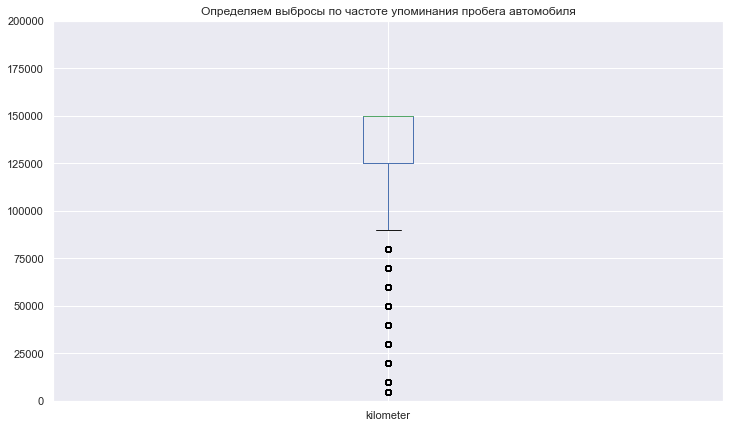

In [40]:
df['kilometer'].hist(bins=8,figsize=(12, 7)).set_title('Распределение по километражу')
plt.xlim(-15,170000)

plt.xlabel("километраж")
plt.ylabel("частота упоминания ")
plt.show()

print('______________________________________________________________________________________________')
df.plot(y='kilometer', kind='box', figsize=(12, 7),title='Определяем выбросы по частоте упоминания пробега автомобиля')
plt.ylim(-150, 200000)
plt.xlim(0, 2) 
plt.show()

__Повсей видимости в пробег 150 тыс. км,  были включены все последующие  данные о пробегах (150 > )___

__Обратботка  значения 0 в столбце registrationmonth__

In [41]:
df['registrationmonth'].value_counts() # обнаружили значение 0 

0     36243
3     34232
6     31329
4     29134
5     29000
7     27063
10    26009
12    24160
11    24106
9     23701
1     23015
8     22531
2     21162
Name: registrationmonth, dtype: int64

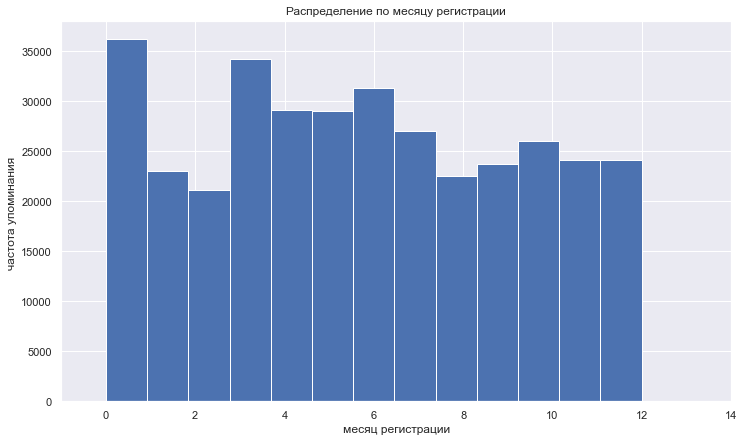

In [42]:
df['registrationmonth'].hist(bins=13,figsize=(12, 7)).set_title('Распределение по месяцу регистрации')
plt.xlim(-1,14)

plt.xlabel("месяц регистрации")
plt.ylabel("частота упоминания ")
plt.show()


__Удалим нулевое 0 значение из столбца registrationmonth. Выведем график  проверки результата удаления.__

In [43]:
# Вариант № 1 Заменим значение месяц регистрации = 0  ближайшими значениями
df.loc[df['registrationmonth'] == 0, 'registrationmonth'] = pd.NA
df['registrationmonth'] = df['registrationmonth'].fillna(method='bfill')


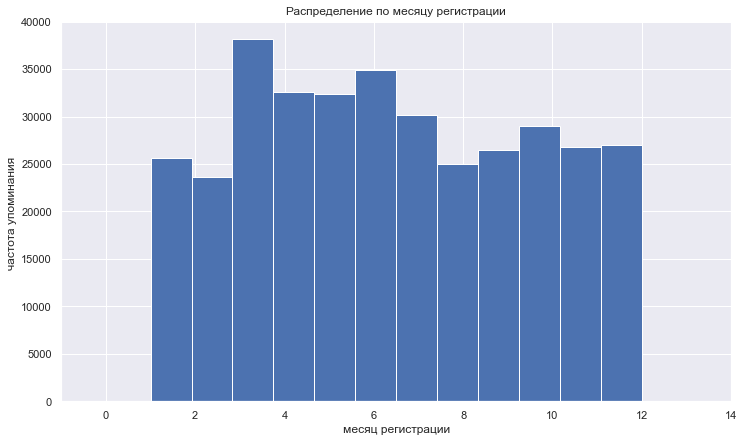

In [44]:
df['registrationmonth'].hist(bins=12,figsize=(12, 7)).set_title('Распределение по месяцу регистрации')
plt.xlim(-1,14)

plt.xlabel("месяц регистрации")
plt.ylabel("частота упоминания ")
plt.show()

__Удалили значение 0 в столбце registrationmonth__

----

__4 Замениv формат в столбцах "DateCrawled", "DateCreated","LastSeen"__ сo строкового __object__ на временной __datetime__. И во вново образовавшихся столбцах __'gaz', 'hybrid', 'petrol',  'sedan', 'suv', 'wagon'__ c uint8 на формат int

In [45]:
# Вариант № 1
data_format = ['datecrawled', 'datecreated', 'lastseen']
# список со столбцами дата для смены формата

int_format = ['gaz', 'hybrid', 'petrol',  'sedan', 'suv', 'wagon']
# список с целочисленными  столбцами  для смены формата
for i in data_format:
    
    df[i] = pd.to_datetime(df[i], format='%Y-%m-%dT%H:%M:%S')# исправляем формат в списке data_format c object на datetime
    
for i in int_format:
        
    df[i] = (df[i]).astype('int64')# исправляем формат в списке int_format c object на int


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351685 entries, 0 to 354368
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        351685 non-null  datetime64[ns]
 1   price              351685 non-null  int64         
 2   vehicletype        351685 non-null  object        
 3   registrationyear   351685 non-null  int64         
 4   gearbox            351685 non-null  int64         
 5   power              351685 non-null  int64         
 6   model              351685 non-null  object        
 7   kilometer          351685 non-null  int64         
 8   registrationmonth  351685 non-null  int64         
 9   fueltype           351685 non-null  object        
 10  brand              351685 non-null  object        
 11  notrepaired        351685 non-null  int64         
 12  datecreated        351685 non-null  datetime64[ns]
 13  numberofpictures   351685 non-null  int64   

__5 Удаляем__ методом drop() столбцы 	__'numberofpictures'__,	__'postalcode'__ __'datecrawled','datecreated','lastseen'__

In [47]:
df['numberofpictures'].value_counts()# количество фото по всем объектам 0 столбец не информативен 

0    351685
Name: numberofpictures, dtype: int64

In [48]:
# удаляпем столбцы "RegistrationMonth", "NumberOfPictures"
df = df.drop(['vehicletype','fueltype','numberofpictures','postalcode','datecrawled','datecreated','lastseen'], axis=1)


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Пару слов, почему решил удалить эти колонки, буквально двумя ячейками выше было затрачено время и силы на их заполнение. </div>


<div class="alert alert-info"> <b>Комментарий студента:</b>'vehicletype','fueltype','numberofpictures','postalcode' - первые два были обработаны ОНЕ - стали не нужны. 'numberofpictures','postalcode' не информативны, а вот с 'datecrawled','datecreated','lastseen' - Да, грешен. я конечно же обратил на это внимание, но если честно, эти работы, являются подспорьем (по методам) в следующих проектах. Стараюсь, для закрепления, максимально сохранить методы, которые вспомнил или обнаружил. Согласен в реальном проекте лишнее не допустимо. К слову про реальность проекта, у меня возник вопрос к данным. Можно сделать вывод, что последняя активность была в 2016 году, но уже тогда были тачки 2019 года.
    
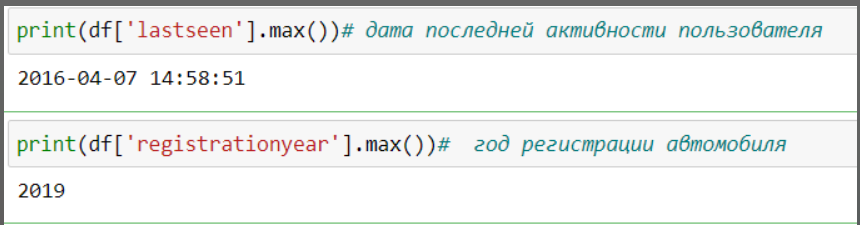
    
Да, вспомнил еще вопрос по типу данных. Подскажи я перевел типы uint8 в int после первых ОНЕ далее этого не делал и юпитер  принял и не сопротивлялся, значит так можно? Т.е тип uint8 тоже возможен для работы?





</div>


<div class="alert alert-success">
    
<b>Комментарий ревьюера v.2:</b> ✔️Хорошо, что ты очень внимателен, на 100 % ответить не смогу, думаю датасет составляля примерно на 2017-2018 год,а 2019 это опечако, 0 с 9 перепутали при занесении.

Что касается uint8 это тип данных numpy, у него их больше(типов данных) чем у pandas например, а т.к. OHE это викторизация, то приводится к этому типу, ну это если кратко. Пару ссылочек, если захочешь покапаться. 
https://www.helenkapatsa.ru/bystroie-kodirovaniie/
https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/preprocessing/_encoders.py#L183</div>

In [49]:
df.describe() # цифровой анализ

,price,registrationyear,gearbox,power,kilometer,registrationmonth,notrepaired,gaz,hybrid,petrol,sedan,suv,wagon
count,"351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00","351,685.00"
mean,"4,574.94","2,003.16",0.80,120.10,"128,449.17",6.39,0.87,0.02,0.00,0.67,0.55,0.04,0.30
std,"4,512.00",7.21,0.40,53.47,"37,545.74",3.35,0.33,0.14,0.03,0.47,0.50,0.19,0.46
min,40.00,"1,960.00",0.00,5.00,"5,000.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,200.00","1,999.00",1.00,75.00,"125,000.00",4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,900.00","2,003.00",1.00,110.00,"150,000.00",6.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
75%,"6,500.00","2,008.00",1.00,150.00,"150,000.00",9.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00
max,"20,000.00","2,019.00",1.00,500.00,"150,000.00",12.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


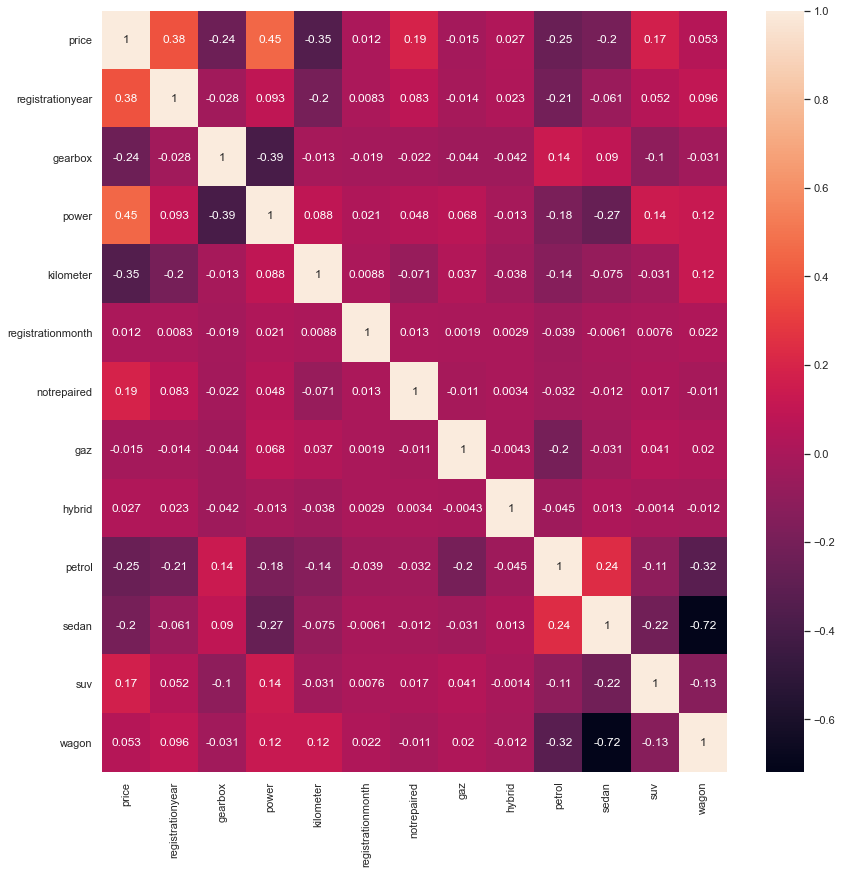

In [50]:
# провери нет ли корреляции в  признаках
sn.set(rc={'figure.figsize':(14,14)})
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

---

__Аномальные  и  нулевые значения устранены, сильной корреляции не обнаружено__

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⚠️Возможно сильной корреляции нет, но все же она есть, прямая между мощностью и стоимостью и обратная между пробегом и стоимостью, в данном случае можно сказать, что матрица нам нужна, хотя бы для того, чтоб убедиться в адекватности нашей обработки данных. В начале тоже была таблица с корреляцией и если их сравнить, мы увидим разницу, а это будет подтверждением того, что мы на верном пути.</div>


---

__6 Методом OHE кодируем  оставшиеся категориальные признаки__

In [51]:
df = pd.get_dummies(df, drop_first=True) #Кодирую  оставшиеся категориальные признаки методом OHE
#del df #Удаляю исходный датасет

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️А какие у нас признаки остались после первой кодировки. Попробуй сделать её один раз </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> <br>На этом этапе остались столбцы с категориальными признаками model и brand. По хорошему, можно было все столбцы с  категориальными признаками, после предобработки, прогнать через ОНЕ и не городить огород выше, ценность проделанного только одна - закрепление методов.</div>

In [52]:
df.head(3)

,price,registrationyear,gearbox,power,kilometer,registrationmonth,notrepaired,gaz,hybrid,petrol,sedan,suv,wagon,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kappa,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_other,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_samara,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_1,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,480,1993,1,190,150000,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

__7 Удалим  обнаруженных дубликата__

__Методом df.drop_duplicates() удаляем дубликаты при помощи .reset_index(drop=True) создаем новую индексацию.__ 

In [53]:
df.duplicated().sum()# смотрим результат после применения метода .drop_duplicates()

26974

In [54]:
df = df.drop_duplicates().reset_index(drop=True) 

In [55]:
df.duplicated().sum()# смотрим результат после применения метода .drop_duplicates()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324711 entries, 0 to 324710
Columns: 301 entries, price to brand_volvo
dtypes: int64(13), uint8(288)
memory usage: 121.4 MB


 <div style="border:solid green 2px; padding: 20px">
    

**Вывод** <br>
На данном  этапе, проведена загрузка данных, изучена общая информация, внесены корректировки и исправления оформления и признаков датасета df.
<br>Для __анализа данных__ и __построения моделей__, предоставлен датасет содержащий информацию __о пользователях__ сервиса по продаже автомобилей  компании __«Не бит, не крашен»__. Табличные данные  состоят из **16,** столбцов (__признаки__)  и **354369** строк(__объектов наблюдения__). 
    
   1. __Перевели заглавные буквы названия столбцов__, методом `columns.str.lower()`, в нижний регистр . 
    
   2. __При предварительном ознакомлении были обнаружены пропуски в данных - столбцы:__
- __notrepaired__ - 71154 `была машина в ремонте или нет`
- __vehicletype__ - 37490 `тип автомобильного кузова`	
- __fueltype__    - 32895 `тип топлива`
- __gearbox__     - 19833  `тип коробки передач` 
- __model__       - 19705  `модель автомобиля`
    
Пропущенные значения было решено заполнить ближайщими значениями при помощи метода  __df.bfill().ffill()__
    
   3. __Были обнаружены выбросы__ и __0___(нулевые) значения в столбцах:
- __price__ -            `была машина в ремонте или нет`
- __power__ -            `тип автомобильного кузова`	
- __registrationmonth__  `месяц регистрации автомобиля`
- __numberofpictures__   `количество фотографий автомобиля` 

Заменили  значения  0 на ближайшие показатели убрали выбросы
    
   4. Произвели замену __формата__ в столбцах 'datecrawled', 'datecreated','lastseen' сo строкового object на временной datetime. И во вново образовавшихся столбцах __'gaz', 'hybrid', 'petrol', 'sedan', 'suv', 'wagon'__ c uint8 на формат __int__
   5.__Было решено __удалилить__ методом __drop()__ столбцы 	__'numberofpictures'__,	__'postalcode'__ __'datecrawled','datecreated','lastseen'__. 
   6. Методом __OHE .get_dummies()__ кодировали  __категориальные__ признаки в __чиловые__
    
   7. Так же  были обнаружены __26974__ строки дубликаты - удалены методом  __drop_duplicates()__
    
После __предварительной подготовки__, для __обученя моделей__ получили  датасет __df__ состоящий из __324711__ объектов наблюдения (**строк**) и  __301__  признака (**столбца**)   

**Были выделены следующие признаки:**  
<br>**Общие признаки:** `vehicletype, registrationyear,  gearbox, power, model, kilometer, registrationmonth, notrepaired, fueltype, brand`    		
<br>**Целевой признак:** `price`

В полученном для исследования датасете, были  **произведены** необходимые преобразования. Данные готовы для **построения моделей** машинного обучения  и  выбора оптимального алгоритма  __определеня стоимости__ автомобиля .   
    
   
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично! Все данные обработали, есть выод по главе.
</div>

## Обучение моделей
[&#10224;](#step1)

<a id='step3'></a>

 <div style="border:solid green 2px; padding: 20px">
    
**На данном этапе** <br>
 
Обучим четыре модели ориентируясь на метрику __RMSE__. В качестве моделей используем  Линейную регрессию, Случайный лес, LGBMRegressor, CatBoostRegressor.    
    
    
 __Исследуем качество разных моделей__, меняя гиперпараметры. Кратко опишем выводы исследования. Выберем лучщие показатели, для дальнейшей проверки на тестовой выборке. Перед обучением моделей в обучающей и валидационной выборках выделем __общие__  и __целевой__ признаки. Создадим функцию расчета   __RMSE__

### Построим и протестируем модели  :<a class="tocSkip">

-  __Линейная регрессия__ -  [LinearRegression](#step2)    
-  __Cлучайный лес__    - [RandomForestClassifier](#step4)
-  __LGBMRegressor__  - [LGBMRegressor](#step5)
-  __CatBoostRegressor__  - [CatBoostRegressor](#step6)
   
</div>

__Выделим признаки, разобъем на обучающие и тренировочные выборки.__

In [57]:
features = df.drop('price', axis=1) # Общие признаки
target = df['price'] # Целевой признак

# Разбиваем методом train_test_split на   тренировочные и тестовые выборки
features_train,features_test,target_train,target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)

__Посмотрим как разделились выборки__

In [58]:
# Проверим, корректно ли поделились наши выборки
def percent(df_1,df_2):
    selection_1 = df_1.shape[0]/df.shape[0]
    selection_2 = df_2.shape[0]/df.shape[0]
    print('{:.0%} {:.0%}'.format(selection_1,selection_2))
percent(features_train,features_test)

75% 25%


__Проверим размеры полученных выборок__

In [59]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(243533, 300)
(81178, 300)
(243533,)
(81178,)


In [60]:
# Создадим функцию для расчета метрики RMSE
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5
   
#С помощию функции make_scorer создаю метрику RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично! 
</div>

__Проверим предсказание стоимости автомобиля на различных моделях__

<a id='step2'></a>

__Линейная регрессия - LinearRegression()__<br>
[&#10224;](#step3)

In [61]:
%%time 
# %%time посмотрим время  обучения

# Объявим модель Линейной регрессии
regression_model = LinearRegression()
# Обучим модель
regression_model.fit(features_train, target_train)
#  С помощью кросс-валидации определим RMSE модели 
regression_cv_score = pd.Series(cross_val_score(regression_model,features_train,\
                                                target_train,scoring=RMSE_score,cv=3)).mean()*(-1)
print('Среднее качество модели линейной регрессии на кросс-валидации:', round(regression_cv_score,2) )


Среднее качество модели линейной регрессии на кросс-валидации: 3034.72
Wall time: 17.8 s


<a id='step4'></a>

__Cлучайный лес - RandomForestClassifier__<br>
[&#10224;](#step3)

In [62]:
%%time 
# %%time посмотрим время  обучения

# Объявим модель Случайного леса
forest = RandomForestRegressor()
# Определим словарь с набором параметров
forest_parametrs = { 'n_estimators': range(5, 15, 5),
                     'max_depth': range(1, 6, 2),
                     'min_samples_leaf': range(1,4),
                     'min_samples_split': range(2,6,2) }

# Применим  GridSearchCV с кросс-валидацией
forest_model = GridSearchCV(forest, forest_parametrs, scoring=RMSE_score, cv=3)
forest_model.fit(features_train, target_train)




Wall time: 14min 2s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 6, 2),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': range(5, 15, 5)},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [63]:
%%time

# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
forest_params = forest_model.best_params_
forest_score = forest_model.score(features_train, target_train) * (-1)
print(forest_params)
print(round(forest_score,2))
print('_______________')


{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}
2662.18
_______________
Wall time: 649 ms


<a id='step5'></a>

__LGBMRegressor__<br>
[&#10224;](#step3)

In [64]:
%%time 
# Объявим модель LGBMRegressor
lg = lgb.LGBMRegressor()
# Создаем словарь с набором параметров
lg_parametrs = {"max_depth": [25, 50, 75],
               "learning_rate" : [0.01, 0.1],
               "num_leaves": [200, 500, 1200],
               "n_estimators": range (5, 15, 5)
             }
# Применим  GridSearchCV с кросс-валидацией
lg_model = GridSearchCV(lg, lg_parametrs, scoring=RMSE_score, cv=3)
lg_model.fit(features_train, target_train)

Wall time: 5min 45s


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [25, 50, 75],
                         'n_estimators': range(5, 15, 5),
                         'num_leaves': [200, 500, 1200]},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [65]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
lg_params = lg_model.best_params_
lg_score = lg_model.score(features_train, target_train) * (-1)
print(lg_params)
print(round(lg_score,2))
print('_______________')

{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 10, 'num_leaves': 1200}
2477.09
_______________
Wall time: 1.45 s


<a id='step6'></a>

__CatBoostRegressor__<br>
[&#10224;](#step3)

In [66]:
%%time
# Объявим модель CatBoostRegressor
cb = cb.CatBoostRegressor()
# Словарь с набором параметров
cb_parametrs = {"iterations": [100],
                "depth": range(8, 16, 2),
                "learning_rate" : [0.15]
             }
# Применяем GridSearchCV с кросс-валидацией
cb_model = GridSearchCV(cb, cb_parametrs, scoring=RMSE_score, cv=3)
cb_model.fit(features_train, target_train)

0:	learn: 4104.2006135	total: 150ms	remaining: 14.8s
1:	learn: 3768.0090708	total: 192ms	remaining: 9.39s
2:	learn: 3497.5778345	total: 232ms	remaining: 7.49s
3:	learn: 3275.9768425	total: 273ms	remaining: 6.56s
4:	learn: 3098.6893000	total: 309ms	remaining: 5.87s
5:	learn: 2954.8467329	total: 346ms	remaining: 5.42s
6:	learn: 2843.6575994	total: 381ms	remaining: 5.07s
7:	learn: 2752.6830666	total: 418ms	remaining: 4.8s
8:	learn: 2672.7283003	total: 474ms	remaining: 4.79s
9:	learn: 2612.1895511	total: 511ms	remaining: 4.6s
10:	learn: 2562.1538373	total: 549ms	remaining: 4.44s
11:	learn: 2518.9395294	total: 588ms	remaining: 4.31s
12:	learn: 2471.8283191	total: 627ms	remaining: 4.2s
13:	learn: 2439.2431773	total: 665ms	remaining: 4.09s
14:	learn: 2404.9040612	total: 706ms	remaining: 4s
15:	learn: 2374.5348853	total: 745ms	remaining: 3.91s
16:	learn: 2350.0684107	total: 790ms	remaining: 3.86s
17:	learn: 2332.3200706	total: 827ms	remaining: 3.77s
18:	learn: 2314.3096419	total: 865ms	remaini

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E3B5096D60>,
             param_grid={'depth': range(8, 16, 2), 'iterations': [100],
                         'learning_rate': [0.15]},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [67]:
%%time 
# Определяем оптимальные гиперпараметры и качество модели на кросс-валидации
cb_params = cb_model.best_params_
cb_score = cb_model.score(features_train, target_train) * (-1)
print(cb_params)
print(round(cb_score,2))
print('_______________')

{'depth': 14, 'iterations': 100, 'learning_rate': 0.15}
1924.94
_______________
Wall time: 413 ms


__Соберем полученные результаты в таблицу___

In [78]:
columns = ['Алгоритм Модели', 'Время обучения', 'RMSE - train','']

line = ['Линейная регрессия','17.8 s', round(regression_cv_score,2),'€']

forest = ['Случайный лес','14min 2s', round(forest_score,2),'€']

LGBMRegressor = ['LGBMRegressor','5min 45s',round(lg_score,2),'€']

CatBoostRegressor = ['CatBoostRegressor','5min 15s', round(cb_score,2),'€']

table_result = pd.DataFrame([line, forest, LGBMRegressor, CatBoostRegressor ], columns = columns)
display(table_result)

,Алгоритм Модели,Время обучения,RMSE - train,
0,Линейная регрессия,17.8 s,"3,034.72",€
1,Случайный лес,14min 2s,"2,662.18",€
2,LGBMRegressor,5min 45s,"2,477.09",€
3,CatBoostRegressor,5min 15s,"1,924.94",€


<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         


 Создали и обучили 4-е модели машинного обучения. __Линейная регрессия__, __Случайный лес__	,__LGBMRegressor__, __CatBoostRegressor__ Объявили  функцию __RMSE__   через которую расчитали метрику RMSE_score для каждой модели.
Определили __Время обучения__ каждой модели. Получили  результаты предсказания RMSE на обучающей выборке. Модель __CatBoostRegressor__ показала наилучший результат прогнозирования стоимости автомобиля __1,924.94__	€
</div>  

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично! Модель обучена, хорошо, что используешь кросс-валидацию
</div>

## Анализ моделей
[&#10224;](#step1)

<a id='step12'></a>

<div style="border:solid green 2px; padding: 20px">
    
**На данном этапе** <br>
 
Протестируем не test выборке полученные четыре модели __Линейную регрессию, Случайный лес, LGBMRegressor, CatBoostRegressor__.  ориентируясь на метрику RMSE.    
    
   
### Протестируем на тестовой выборке  модели  :<a class="tocSkip">

-  __Линейная регрессия__ -  [LinearRegression](#step7)    
-  __Cлучайный лес__    - [RandomForestClassifier](#step8)
-  __LGBMRegressor__  - [LGBMRegressor](#step9)
-  __CatBoostRegressor__  - [CatBoostRegressor](#step10)
    
-  __Проведем их проверку__ на - [адекватность](#step11)  
</div>

<a id='step7'></a>

__Линейная регрессия - LinearRegression()__<br>
[&#10224;](#step12)

In [69]:
%%time
# Протестируем regression_model  на тестовой выборке features_test

regression_model_predictions = regression_model.predict(features_test)

# Определим метрику RMSE
regression_RMSE = round(RMSE(target_test, regression_model_predictions), 3)
print('RMSE модели Линейной регрессии:', regression_RMSE)

RMSE модели Линейной регрессии: 3003.049
Wall time: 282 ms


<a id='step8'></a>

__Cлучайный лес - RandomForestClassifier__<br>
[&#10224;](#step12)

In [70]:
%%time
# Протестируем forest_model  на тестовой выборке features_test

forest_model_predictions = forest_model.predict(features_test)

# Определим метрику RMSE
forest_RMSE = round(RMSE(target_test, forest_model_predictions), 2)
print('RMSE модели Случайного леса:', forest_RMSE)

RMSE модели Случайного леса: 2667.57
Wall time: 253 ms


<a id='step9'></a>

__LGBMRegressor__<br>
[&#10224;](#step12)

In [71]:
%%time
#  Протестируем lg_model  на тестовой выборке features_test

lg_model_predictions = lg_model.predict(features_test)

# Определим метрику RMSE
lg_RMSE = round(RMSE(target_test, lg_model_predictions), 3)
print('RMSE модели LGBMRegressor:', lg_RMSE)

RMSE модели LGBMRegressor: 2543.22
Wall time: 428 ms


<a id='step10'></a>

__CatBoostRegressor__<br>
[&#10224;](#step12)

In [72]:
%%time
#  Протестируем cb_model  на тестовой выборке features_test
cb_model_predictions = cb_model.predict(features_test)

# Определим метрику RMSE
cb_RMSE = round(RMSE(target_test, cb_model_predictions), 3)
print('RMSE модели CatBoostRegressor:', cb_RMSE)

RMSE модели CatBoostRegressor: 2022.643
Wall time: 900 ms


<a id='step11'></a>

__Создадим константную модель. Проверим модели на  адекватность__<br>
[&#10224;](#step12)

In [73]:
%%time
# Для проверки адекватности моделей создадим константную модель
const_model = [target_test.median() for i in range(0, len(target_test))]

# Определим метрику RMSE константной модели
const_RMSE = round(RMSE(target_test, const_model), 2)
print('RMSE для константной модели', const_RMSE)

RMSE для константной модели 4823.05
Wall time: 1min 32s


__Соберем полученные результаты в таблицу___

In [79]:
columns = ['Алгоритм Модели','Время тестирования',  'RMSE - test',' ']

line = ['Линейная регрессия','282 ms', round(regression_RMSE,2),'€']

forest = ['Случайный лес','253 ms', round(forest_RMSE,2),'€']

LGBMRegressor = ['LGBMRegressor','428 ms',round(lg_RMSE,2),'€']

CatBoostRegressor = ['CatBoostRegressor','900 ms', round(cb_RMSE,2),'€']

Constant_model = ['Constant model','1min 32s', round(const_RMSE,2),'€']

table_result_test = pd.DataFrame([line, forest, LGBMRegressor, CatBoostRegressor, Constant_model], columns = columns)

table_result_test['Качество > Constant model, %'] =  round((1-table_result_test['RMSE - test']/const_RMSE) * 100, 2)
display(table_result_test)

,Алгоритм Модели,Время тестирования,RMSE - test,,"Качество > Constant model, %"
0,Линейная регрессия,282 ms,"3,003.05",€,37.74
1,Случайный лес,253 ms,"2,667.57",€,44.69
2,LGBMRegressor,428 ms,"2,543.22",€,47.27
3,CatBoostRegressor,900 ms,"2,022.64",€,58.06
4,Constant model,1min 32s,"4,823.05",€,0.00


<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         

 - На тестовой выборке __features_test__ проверили результаты предсказаний ранее созданных  4-х моделей машинного обучения. __Линейная регрессия__, __Случайный лес__	,__LGBMRegressor__, __CatBoostRegressor__   Функцией __RMSE__   расчитали метрику RMSE для каждой модели на тестовой выборке.    Определили __Время тестирования__ исследуемых моделей.<br> 
 - Для проверки адекватности моделей, создали __константную модель__  `const_model` и сравнили полученные на ней  результаты с результатами наших моделей. По сравнению с __константной моделью__ все ранее созданные модели, показали лучший результат ~ в два раза.
 - Модель __CatBoostRegressor__  так же, как и на обучающей выборке, показала лучший результат приближения ответа по  стоимости автомобиля __2,022.64__	€    
 - Результаты проверки моделей на  __тестовой выборке__ подтверждают __работостособность__ моделей по прогнозированию, с разной долей вероятности, стоимости автомобиля.    .
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Здорово! Модель протестировали. Есть вывод по главе.
</div>

## Общий вывод
[&#10224;](#step1)

In [75]:
# методом merge объединякм таблицы  table_result и table_result_test  
table = table_result.merge(table_result_test, on='Алгоритм Модели', how='right').fillna(0)
table

,Алгоритм Модели,Время обучения,RMSE - train,,Время тестирования,RMSE - test,,"Качество > Constant model, %"
0,Линейная регрессия,15.6 s,"3,034.72",€,246 ms,"3,003.05",€,37.74
1,Случайный лес,14min 12s,"2,662.18",€,281 ms,"2,667.57",€,44.69
2,LGBMRegressor,6min,"2,477.09",€,437 ms,"2,543.22",€,47.27
3,CatBoostRegressor,5min 10s,"1,924.94",€,219 ms,"2,022.64",€,58.06
4,Constant model,0,0.00,0,1min 32s,"4,823.05",€,0.00



 <div style="border:solid green 2px; padding: 20px">

Была поставлена задача,  для  сервиса __"Не бит, не крашен"__ в существеющем у него пирложения по продаже автомобилей, 
__разработать  и внедрить  модель__ оперативно определяющую __стоимость автомобиля__ пользователя.
Для выполнения этого задания были предоставленны данные в виде таблицы `/datasets/autos.csv` — исходный датасет.
- На этапе ___Предобработки__, было определено, что табличные данные  состояли из **16,** столбцов (__признаки__)  и **354369** строк(__объектов наблюдения__). Предварительное ознакомление выявило необходимость в предобработке , что было сделано на данном этапе выполнения проекта. После предобработки получили рабочий датасет __df__ готовый для построения и анализа моделей машинного обучения. Обработанный датасет __df__ состоит из __324711__ объектов наблюдения (**строк**) и  __301__  признака (**столбца**)
- На  шаге __Обучение моделей__  Создали и обучили __4-е модели__ машинного обучения. __Линейная регрессия__, __Случайный лес__	,__LGBMRegressor__, __CatBoostRegressor__ Объявили  функцию __RMSE__   через которую расчитали метрику RMSE_score для каждой модели. Определили __Время обучения__ каждой модели. Получили  результаты предсказания RMSE на обучающей выборке. Модель __CatBoostRegressor__ показала наилучший результат предсказания стоимости автомобиля __1,924.94__	€
-  В следующем шаге __Анализ моделей__   на тестовой выборке __features_test__ проверили результаты предсказаний ранее созданных  моделей - __Линейная регрессия__, __Случайный лес__	,__LGBMRegressor__, __CatBoostRegressor__   Функцией __RMSE__  Определили __Время тестирования__ исследуемых моделей. 
- Для проверки адекватности моделей, создали __константную модель__  `const_model`__4,823.05__	€	 и сравнили полученные на ней  результаты с результатами исследуемых моделей. По сравнению с __константной моделью__ все ранее созданные модели, показали лучший результат __~__ в __2__ (два) раза. На этапе __Анализа моделей__ - модель __CatBoostRegressor__  аналогично, как и на __обучающей выборке__, показала __наименьший показатель__ метрики **RMSE**, что является __лучшим результатом__ прогнозирования ответа стоимости автомобиля __2,022.64__	€    
- C разной долей вероятности, результаты проверки моделей на  __тестовой выборке__ подтверждают __работостособность__ моделей по определению  стоимости автомобиля. Время __обучения__ моделей  отличается, но время __работы__ на тесте разнится не значительно.    
__Руководству сервиса `"Не бит, не крашен"` для внедрения в приложение по продаже автомобилей, с целью определения стоимости автомобиля,  можно рекомендовать модель `CatBoostRegressor`__ 
    
__Итоги проекта__
- Произведена подготовка данных
- Построены модели для определения рыночной стоимости автомобиля с пробегом;
- Достигнуты требуемого значения метрики RMSE.
- Модели успешно прошли проверку на адекватность.
- Выбрана и рекомендована  лучшая модель  __CatBoostRegressor__   
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️ Отлично! Подробный качественный общий вывод. В целом можно было не сравнивать с константной моделью! 
</div>

<div class="alert alert-success">
<b>Итоговый комментарий ревьюера v.2 </b>  Илья, ты хорошо поработала, была проделана большая  работа, спасибо тебе. Есть несколько моментов которые можно исправить:
    
   - Работа хорошо структуировано
   - Работа в целом и каждый шаг в отдельности сделаны хорошо.
   - Очень аккуратная работа, хорошо оформлена, отличный графический анализ приятно смотреть и проверять.
   - При выборе стратегии заполнения пропусков лучше оставлять краткое обоснование, почему именно тот или иной способ.
   - Ты переводишь все в бинарный признак, потом ещё кодируешь данные, лучше остановиться на одном методе. 
   - Лчень хорошо пользуешься циклами, но в dataframe их лучше избегать, если это возможно.
   - Оставлю тебе ссылку на материал по кодированию признаков, для разных моделей можно применять разные способы и это может повлиять на результат. https://dfedorov.spb.ru/pandas/%D0%A0%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B2%20Python.html 
    
   - У тебя нет критических проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> <br>Статья классная, примеры с кодом - супер. Продвинутый способ насторожил, даже сам тип, который написал статью , так и сказал: - сам не пробовал, но рекомендую)) &#128533; ! А если серьезно - Спасибо за статью, советы, примеры  и в общем за  проверку проекта.  </div>

<div class="alert alert-success">
    <b>Итоговый комментарий ревьюера v.2 </b>  Илья, ты хорошо справился, рад,  что не оставил без внимания мои рекомендации, хотя была такая возможность. Проект принят! Надеюсь, я ответил на твои вопросы. Да, кстати, работа хоть и тренировочная, но имеет доволь прикладной характер, можно рассмотреть случай, что мы занимаемся выкупом б.у. машин, и мы передовой сервис(автоалон), который дает предварительную оценку ещё на сайте, нужно только заполнить анкетку !)
    
  Удачи в будующем!
    </div>

## Чек-лист проверки
[&#10224;](#step1)

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей

In [76]:
import winsound # Звуковое оповещение о заверщении выполнения предыдущих ячеек кода
duration = 1000 # миллисекунды
freq = 440 # Гц
winsound.Beep(freq, duration)

In [77]:
end = time.time()
exec_time(start,end) # вызываем функцию определения времени работы Jupyter Notebook

Время выполнения кода: 00:27:36


#    <br>[**В начало**](#step1)